In [2]:
from configparser import ConfigParser
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pykalman import KalmanFilter
import kalman

config = ConfigParser()
config.read("config.ini", 'UTF-8')
BTC_PATH = config.get("default", "PATH")

In [3]:
def data_prep():
    df = pd.read_pickle(BTC_PATH)

    # 対数収益率に変換
    df['log_price'] = np.log(df['cl'])

    # 欠損値処理
    df.ffill(inplace=True)
    df.bfill(inplace=True)
    return df

df_all = data_prep()

In [4]:
su = 0.001
sw = 0.001

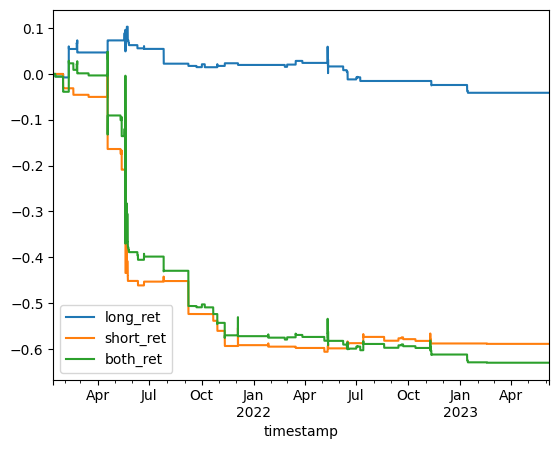

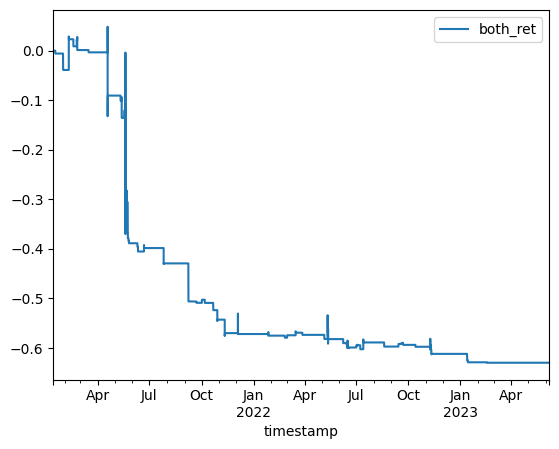

In [6]:
df = df_all.copy()

# 予測
df = kalman.pred_confidence_interval(df, su, sw)

# トレード損益シミュレーション
df = kalman.calc_return(df)

# 可視化
df[["long_ret","short_ret", "both_ret"]].cumsum().plot()
df[["both_ret"]].cumsum().plot()
plt.show()